In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys._enablelegacywindowsfsencoding()
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.

In [4]:
path = "C:/Users/Andres/Google Drive/Facultad/4° CUATRIMESTRE/Organización de Datos/Trabajo Práctico/train.csv"
df = pd.read_csv(path, index_col='id', parse_dates=['fecha'])

In [5]:
df.loc[df['tipodepropiedad'] == 'Casa en condominio', 'tipodepropiedad'] = 'Casa'
df.loc[df['tipodepropiedad'] == 'Casa uso de suelo', 'tipodepropiedad'] = 'Casa'
df = df[df['tipodepropiedad'] == 'Casa'].copy()
df = df[df['provincia'] == 'Distrito Federal'].copy()

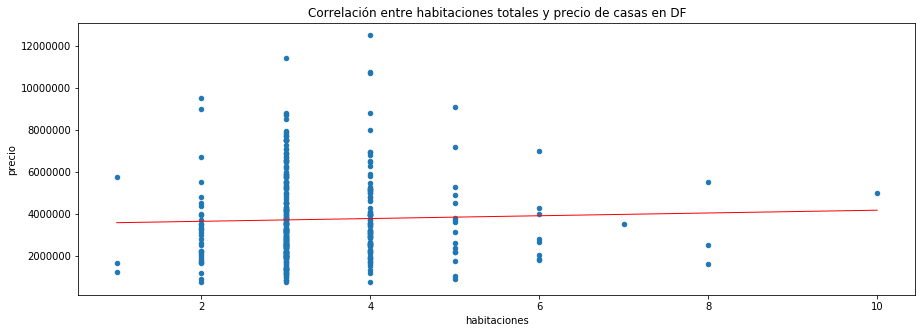

In [6]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'habitaciones'

# Scatter plot
df_sample = df.sample(frac=0.05).copy().dropna().sort_values(column)
df_sample.plot.scatter(x=column, y='precio', figsize=(15, 5), title="Correlación entre habitaciones totales y precio de casas en DF")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = df_sample[column]
y = df_sample['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=1);

In [7]:
#import calendar
#df2 = df.copy()
#df2 = df2.loc[(df2['fecha'] < '2016-12')]
#df2['fecha'] = df2['fecha'].dt.month
#listaDeMeses = list(calendar.month_abbr)
#listaDeMeses.pop(0)
#g = df2['fecha'].value_counts().sort_index().plot(kind='bar',figsize=(15, 5))
#g.set_xticklabels(listaDeMeses,rotation=90);
#df2['fecha'].value_counts()

Text(0.5, 1, 'Heatmap de Publicaciones Por Mes y Anio')

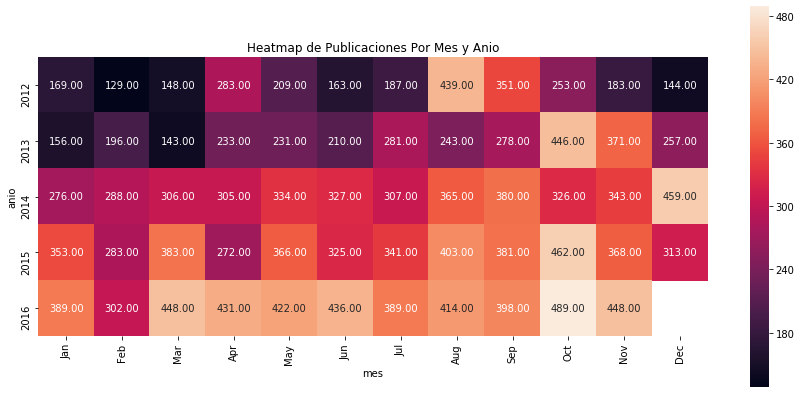

In [8]:
import calendar
df2 = df.copy()
df2 = df2.loc[(df2['fecha'] < '2016-12')]
df2['anio'] = df2['fecha'].dt.year
df2['mes'] = df2['fecha'].dt.month
df2['aux'] = 1
listaDeMeses = list(calendar.month_abbr)
listaDeMeses.pop(0)
grupo = df2.groupby(['anio','mes'])['aux']
plt.figure(figsize=(15, 7))
g = sns.heatmap(grupo.count().unstack(), square=True, annot=True, fmt='.2f')
g.set_xticklabels(listaDeMeses,rotation=90);
g.set_title('Heatmap de Publicaciones Por Mes y Anio')

In [9]:
df2 = df.copy()

In [10]:
df2['contienePrecio'] = df2['descripcion'].str.contains('precio')
df2['contieneVista'] = df2['descripcion'].str.contains('vista')
df2['contieneUbicacion'] = df2['descripcion'].str.contains('ubicacion|zona|ubicación',regex=True)
df2['contieneTamanio'] = df2['descripcion'].str.contains('tamaño|espacio|tamano|tamanio',regex=True)

In [11]:
df2['contieneTamanio'].value_counts()

False    16413
True      4108
Name: contieneTamanio, dtype: int64

In [26]:
def llenarDiccionario(diccionario,descripcion):
    for palabra in descripcion.split():
        palabra = palabra.replace(',','').strip()
        diccionario[palabra] = diccionario.get(palabra,0) + 1
        
def generarDiccionario(df2):
    dicc = {}
    for descripcion in df2['descripcion']:
        if isinstance(descripcion,str): llenarDiccionario(dicc,descripcion)
    return dicc

def limpiarDiccionario(dicc):
    stringDeAdjetivos = urllib.request.urlopen('https://www.solosequenosenada.com/gramatica/spanish/listado/lista_01_adjetivos.php').read().decode("cp1251")
    palabrasARemover = []
    palabrasAIgnorar = ['principal','cuarto','medio','amplia','amplios','completos','trasero','horizontal','comercial']
    for palabra in dicc.keys():
        if len(palabra) <= 3 or palabra in palabrasAIgnorar or (not ('\n'+palabra+' ') in stringDeAdjetivos): palabrasARemover.append(palabra)
    for palabra in palabrasARemover:
        dicc.pop(palabra)
            

15 PALABRAS MAS USADAS EN LA DESCRIPCION DE PROPIEDADES


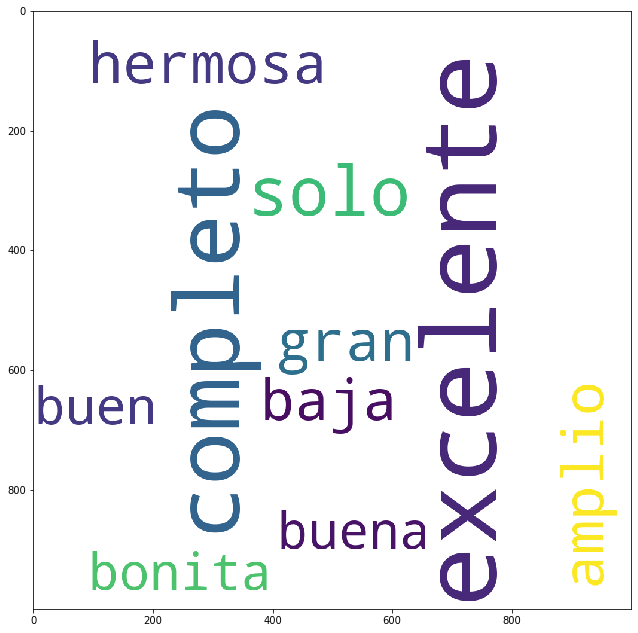

In [31]:
from PIL import Image
from wordcloud import WordCloud 
dicc = generarDiccionario(df2)
limpiarDiccionario(dicc)
print("15 PALABRAS MAS USADAS EN LA DESCRIPCION DE PROPIEDADES")
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=True).generate_from_frequencies(dicc)
plt.figure(figsize=(11, 11))
plt.imshow(wc)

In [ ]:
df.sample(4)